In [46]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [48]:
X_train[0].shape

(28, 28)

In [49]:
type(X_train[0])

numpy.ndarray

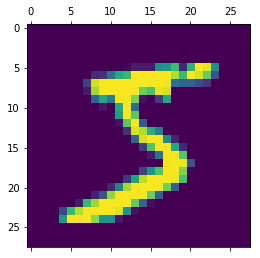

In [50]:
plt.matshow(X_train[0])

In [51]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')
X_train/=255
X_test/=255

In [52]:
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [53]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# Fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60000/60000 [==============================] - 0s - loss: 1.1049 - acc: 0.7716     
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 0.4824 - acc: 0.8910     
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 0.3506 - acc: 0.9120     
Epoch 4/10
60000/60000 [==============================] - 0s - loss: 0.2941 - acc: 0.9231     
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.2602 - acc: 0.9300     
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.2364 - acc: 0.9365     
Epoch 7/10
60000/60000 [==============================] - 0s - loss: 0.2180 - acc: 0.9412     
Epoch 8/10
60000/60000 [==============================] - 0s - loss: 0.2030 - acc: 0.9450     
Epoch 9/10
60000/60000 [==============================] - 0s - loss: 0.1908 - acc: 0.9481     
Epoch 10/10
 6080/10000 [=================>............] - ETA: 0sBaseline Error: 5.16%


In [55]:
print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [56]:
model.predict(np.array([X_train[0]]))

array([[  5.52292587e-03,   6.71409303e-04,   4.30708315e-04,
          1.60809532e-01,   1.10105702e-05,   8.12857628e-01,
          1.74853264e-03,   1.60049740e-02,   8.23635783e-04,
          1.11966731e-03]], dtype=float32)